In [1]:
#BrittanyDougall_SteveHall_PrabhuNarsina_EdwardSalinas_Lab2.Rmd (line 373)
get.best.arima <- function(x.ts, maxord = c(1,1,1,1,1,1))
{
    best.aic <- 1e8
    df.results = data.frame()
    n<-length(x.ts)
    for(p in 0:maxord[1]) for(d in 0:maxord[2]) for(q in 0:maxord[3])
      for(P in 0:maxord[4]) for(D in 0:maxord[5]) for(Q in 0:maxord[6])
      {
        tryCatch(
        {
          fit <- arima(x.ts, order=c(p,d,q),
                             seas = list(order=c(P,D,Q), frequency(x.ts)), 
                                         method="ML")
          
          npar <- length(fit$coef[fit$mask]) + 1
          nstar <- length(fit$residuals) - fit$arma[6] - fit$arma[7]*fit$arma[5]
  
          fit.aic <- fit$aic
          fit.bic <- fit.aic + npar * (log(nstar) - 2)
          fit.aicc <- fit.aic + 2 * npar * (nstar/(nstar - npar - 1) - 1)
          
          df <- data.frame(model= paste(p,d,q,P,D,Q), AICc= fit.aicc,
                           AIC= fit.aic, BIC= fit.bic)
          df.results <- rbind(df.results, df)
        },
        error=function(cond) {
            paste('Error with [', p,',',d,',',q,']', '[', P,',',D,',',Q,']')
        }
        )
      }
    #df.results
    df.results<-df.results[order(df.results$AICc),]
    #print("df.results")
    #print(head(df.results))
    df.results
}
    
getArimapdqPDQFromModelStr=function(ms,data) {
    tba_params=unlist(strsplit(ms," "))
    #print(paste("tba_params",tba_params))
    p=as.integer(tba_params[1])
    d=as.integer(tba_params[2])
    q=as.integer(tba_params[3])
    P=as.integer(tba_params[4])
    D=as.integer(tba_params[5])
    Q=as.integer(tba_params[6])
    #print(P)
    #print(D)
    #print(Q)
    the_arima=arima(data, order=c(p,d,q), seas = list(order=c(P,D,Q),12),method="ML")
    return(the_arima)
}

In [2]:
cnra_dir="./CNRA_data/"
cnra_glob=paste(cnra_dir,"*W+([0-9]).csv",sep="")
cnra_glob=paste(cnra_dir,"*W00*.csv",sep="")
cnra_files=Sys.glob(cnra_glob, dirmark = TRUE)
print(cnra_files)

[1] "./CNRA_data/340033N1170693W001.csv" "./CNRA_data/353890N1191471W001.csv"
[3] "./CNRA_data/373177N1219435W005.csv" "./CNRA_data/373922N1183430W001.csv"


In [3]:
getModelFromARMA=function(ARMA) {
    #A compact form of the specification, as a vector giving the number of 
    #AR, MA, seasonal AR and seasonal MA coefficients, 
    #plus the period and the number of non-seasonal and seasonal differences.
    p=ARMA[1]
    q=ARMA[2]
    P=ARMA[3]
    Q=ARMA[4]
    period=ARMA[5]
    d=ARMA[6]
    D=ARMA[7]
    resultBasic=paste(p,d,q,sep=",")
    resultSeasn=paste(P,D,Q,sep=",")
    bigResult=paste("(",resultBasic,")",sep="")
    if(period!=0) {
        bigResult=paste(bigResult,"(",resultSeasn,")[",period,"]",sep="")
    }
    return(bigResult)
    
}



Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



  Year JanIdx MarIdx
1 2013    121    123
2 2014    133    135
3 2015    145    147
4 2016    157    159
[1] 2013


Warning message in if (prediction_auto_arima == 0) {:
“the condition has length > 1 and only the first element will be used”


[1] "rmse auto  4.6  RMSE best  6.35"
[1] "########################################"
[1] 2013


Warning message in if (prediction_auto_arima == 0) {:
“the condition has length > 1 and only the first element will be used”


[1] "rmse auto  8.13  RMSE best  6.79"
[1] "########################################"
[1] 2013


Warning message in if (prediction_auto_arima == 0) {:
“the condition has length > 1 and only the first element will be used”


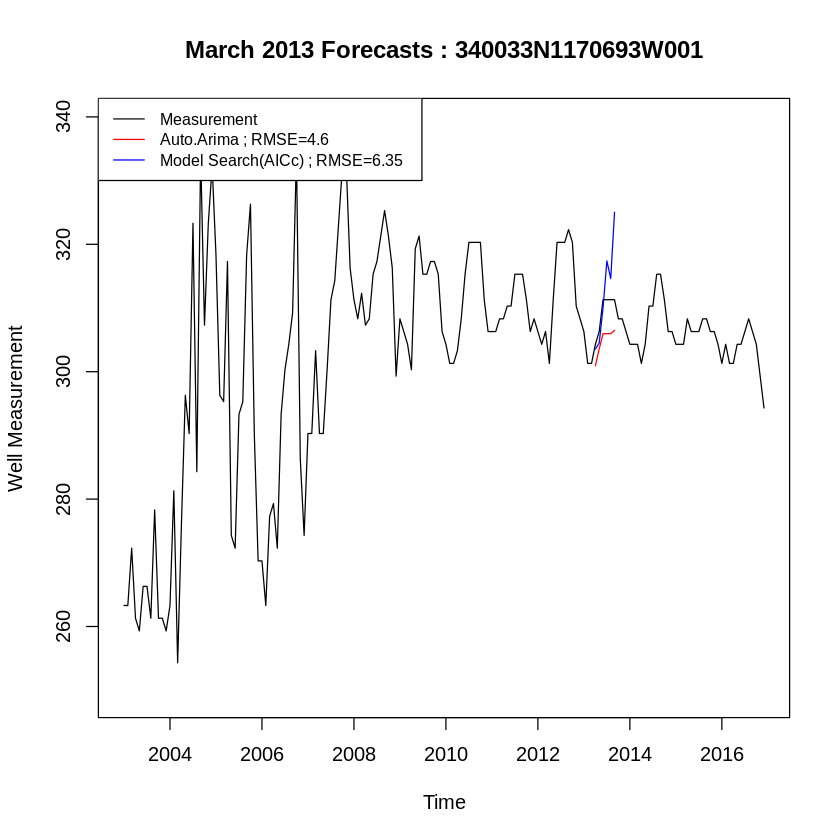

[1] "rmse auto  3.35  RMSE best  3.44"
[1] "########################################"
[1] 2013


Warning message in if (prediction_auto_arima == 0) {:
“the condition has length > 1 and only the first element will be used”


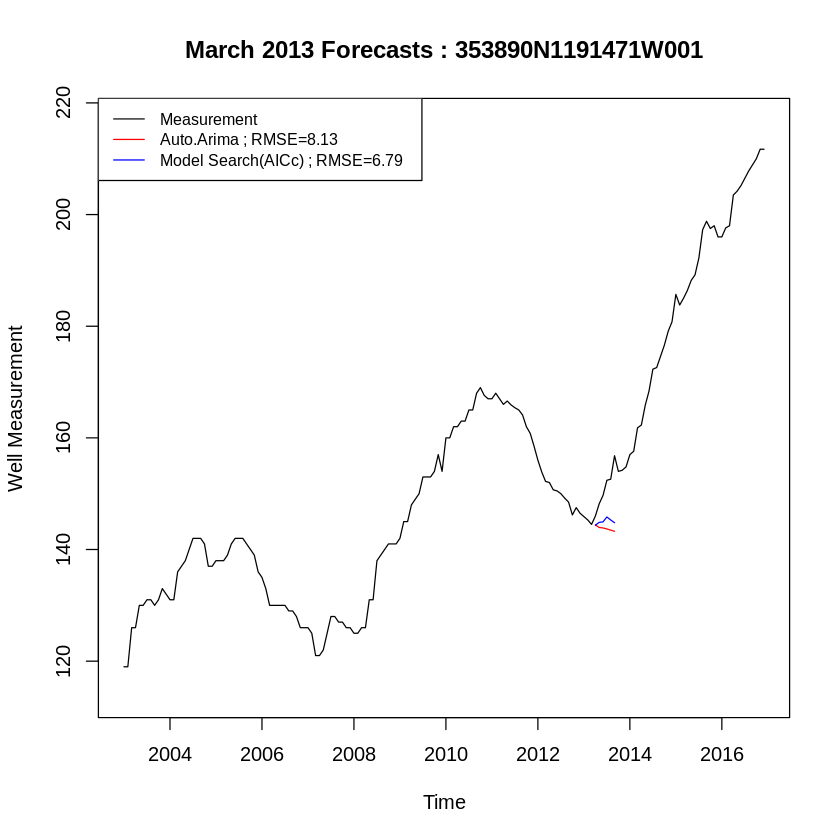

[1] "rmse auto  1.72  RMSE best  0.39"
[1] "########################################"
[1] 2014


Warning message in if (prediction_auto_arima == 0) {:
“the condition has length > 1 and only the first element will be used”


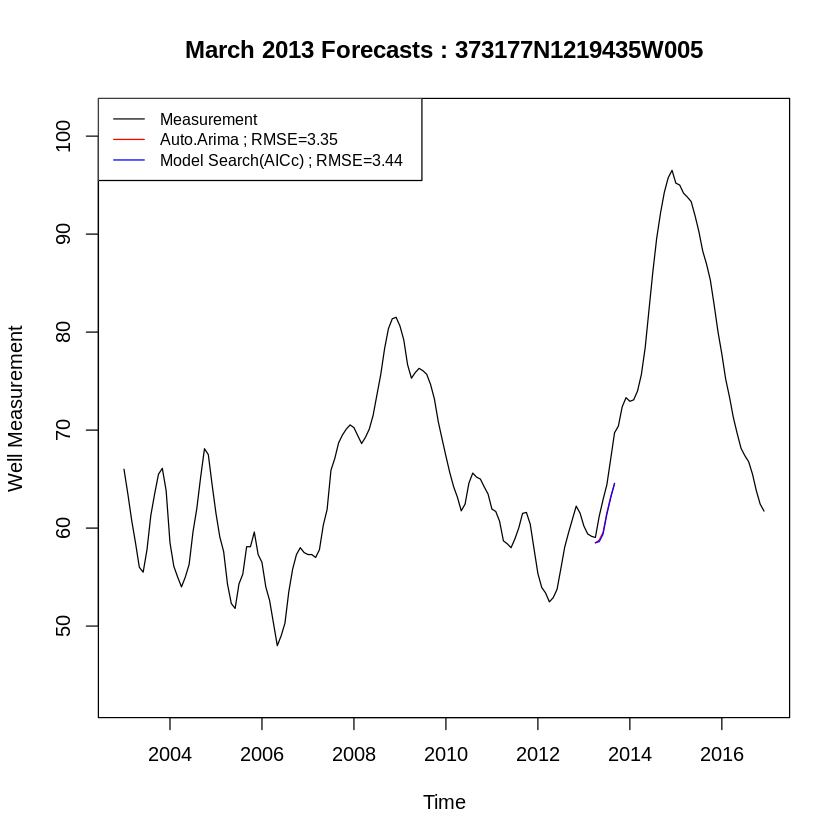

[1] "rmse auto  5.48  RMSE best  4.79"
[1] "########################################"
[1] 2014


Warning message in if (prediction_auto_arima == 0) {:
“the condition has length > 1 and only the first element will be used”


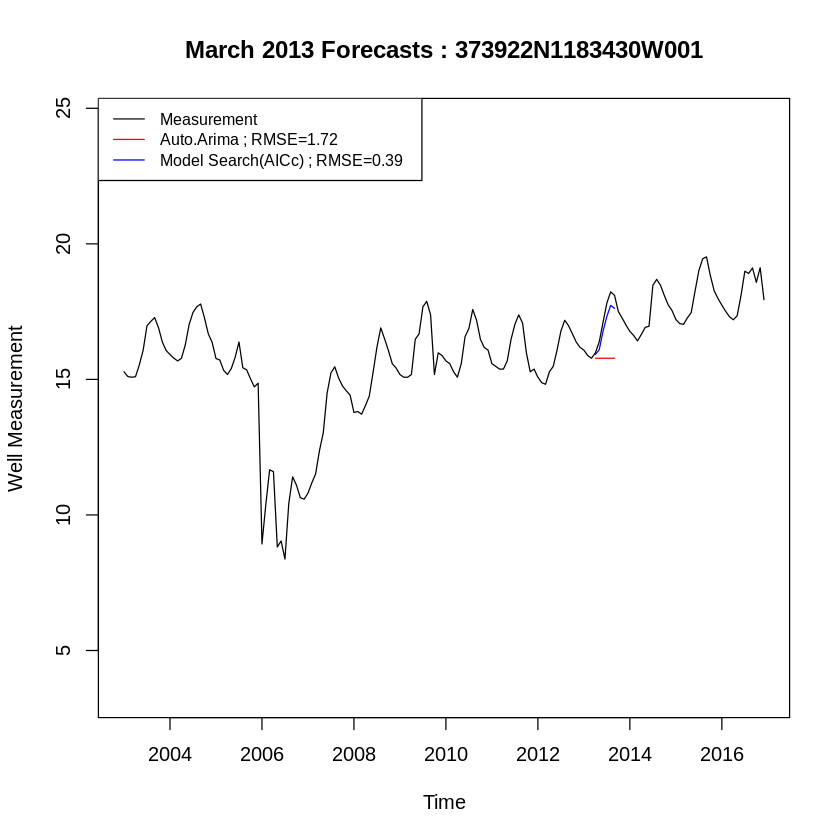

[1] "rmse auto  4.09  RMSE best  0.77"
[1] "########################################"
[1] 2014


Warning message in if (prediction_auto_arima == 0) {:
“the condition has length > 1 and only the first element will be used”


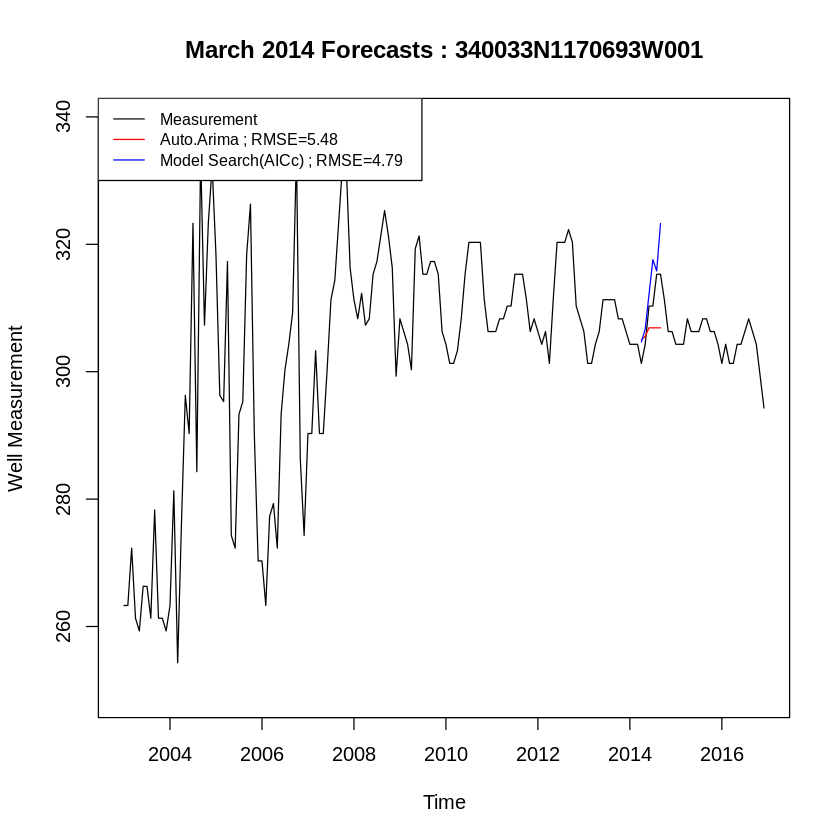

[1] "rmse auto  8.01  RMSE best  6.21"
[1] "########################################"
[1] 2014


Warning message in if (prediction_auto_arima == 0) {:
“the condition has length > 1 and only the first element will be used”


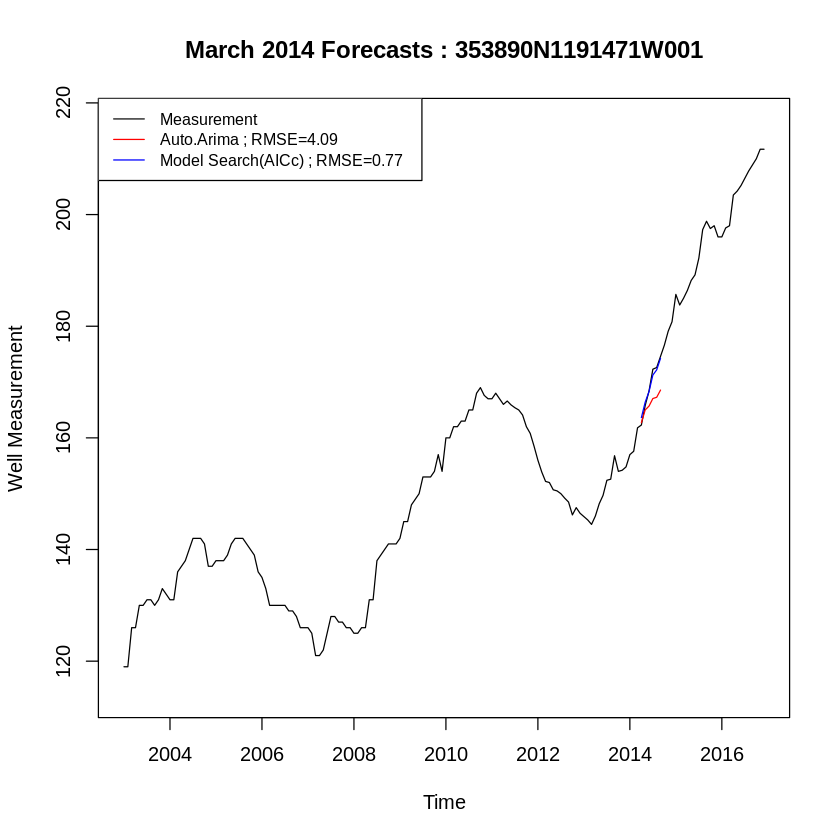

[1] "rmse auto  1.02  RMSE best  0.31"
[1] "########################################"
[1] 2015


Warning message in if (prediction_auto_arima == 0) {:
“the condition has length > 1 and only the first element will be used”


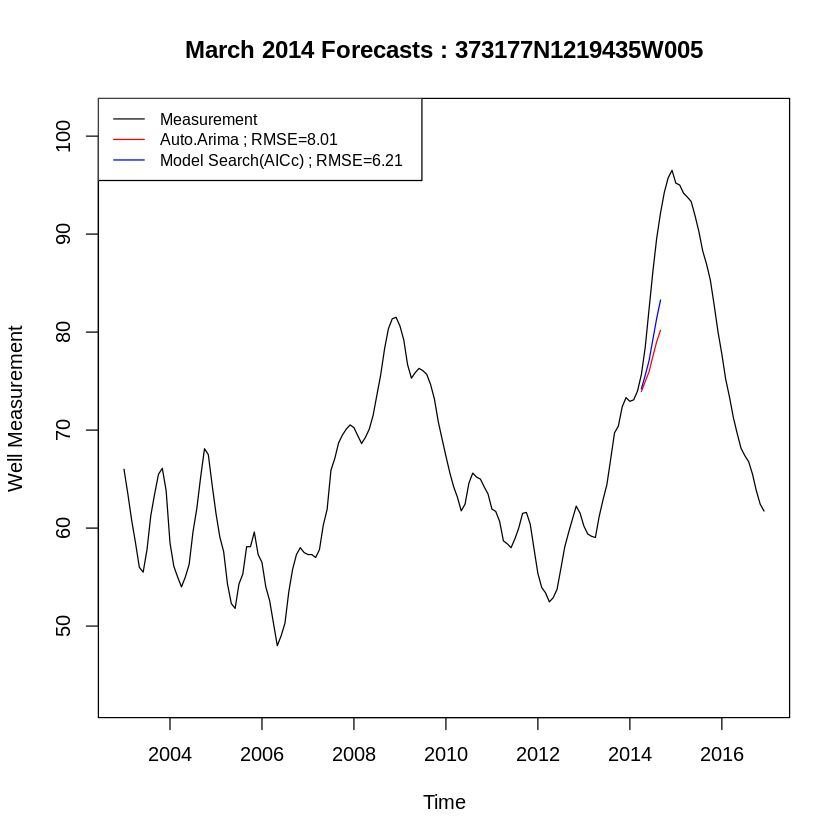

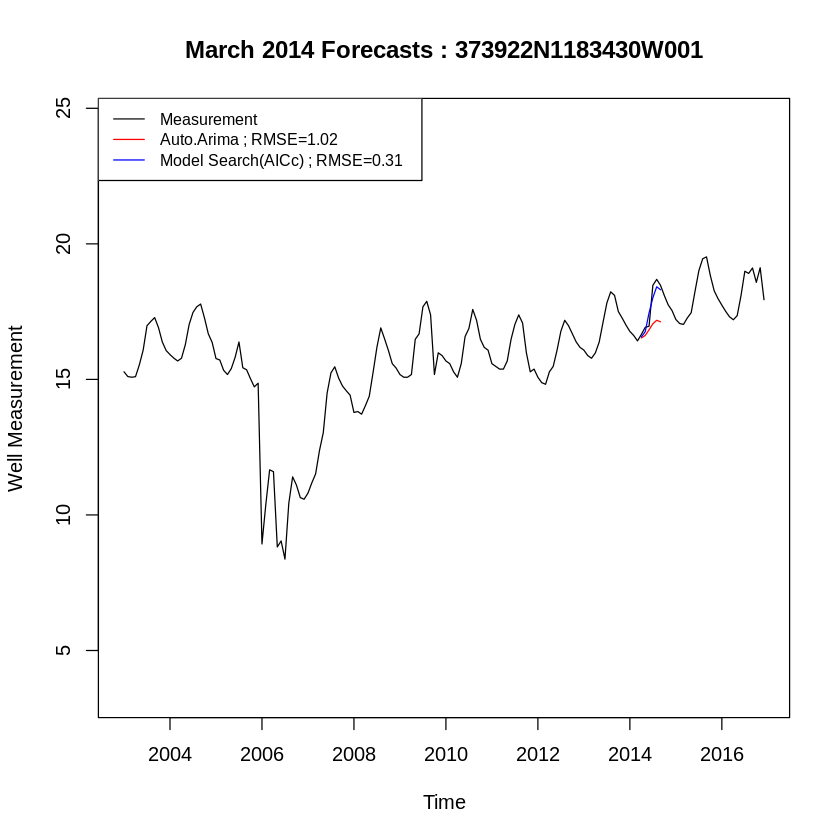

[1] "rmse auto  3.18  RMSE best  7.93"
[1] "########################################"
[1] 2015
[1] "rmse auto  8.4  RMSE best  1.79"
[1] "########################################"
[1] 2015


Warning message in if (prediction_auto_arima == 0) {:
“the condition has length > 1 and only the first element will be used”


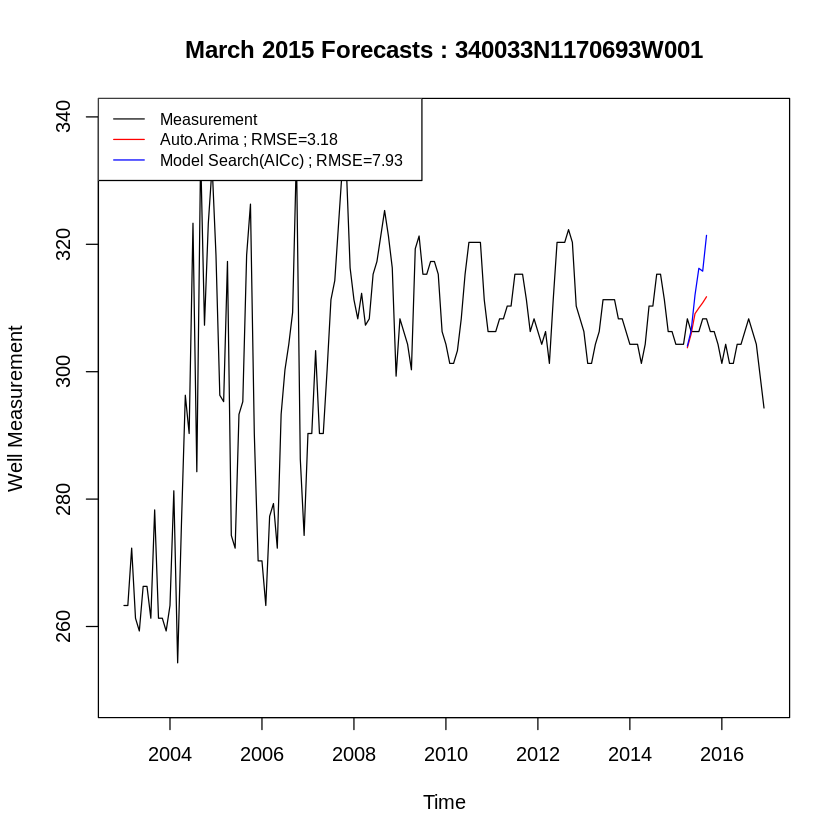

[1] "rmse auto  9.19  RMSE best  9.16"
[1] "########################################"
[1] 2015


Warning message in if (prediction_auto_arima == 0) {:
“the condition has length > 1 and only the first element will be used”


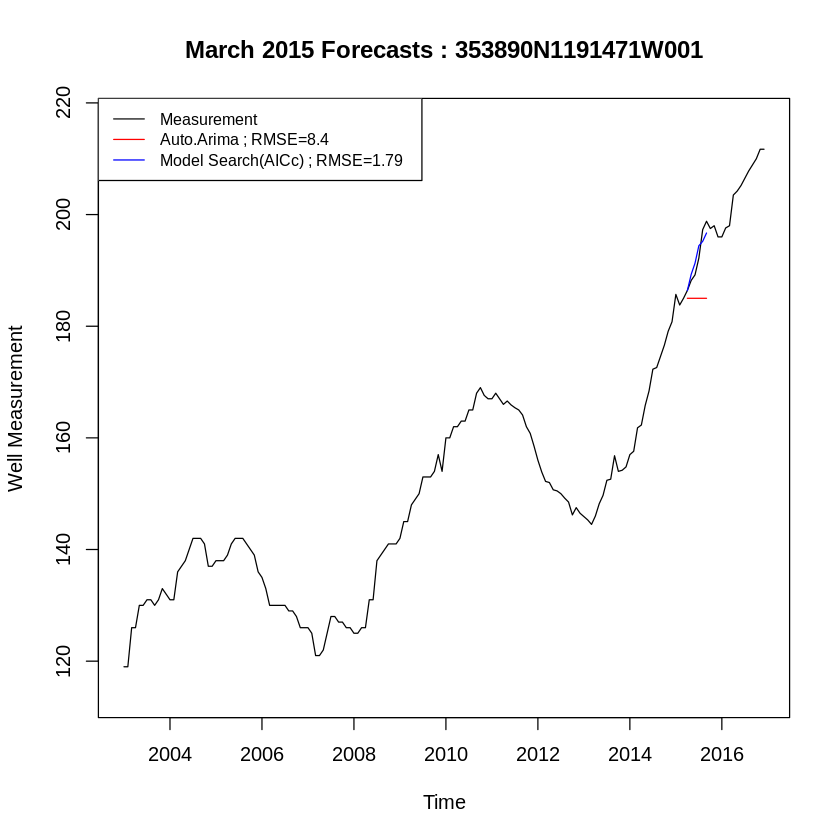

[1] "rmse auto  0.4  RMSE best  0.34"
[1] "########################################"
[1] 2016


Warning message in if (prediction_auto_arima == 0) {:
“the condition has length > 1 and only the first element will be used”


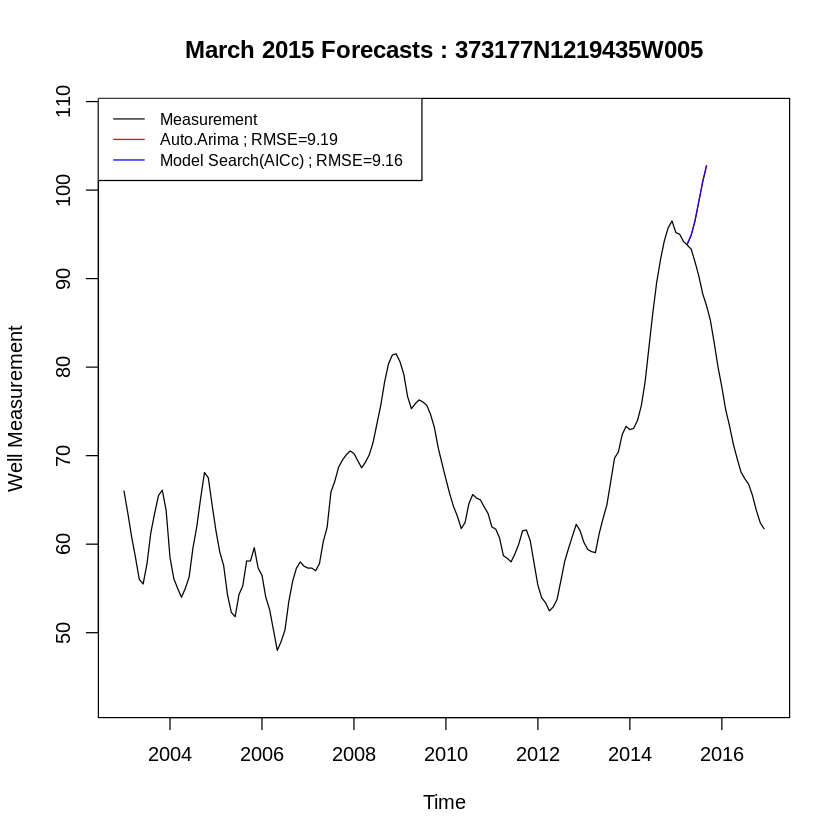

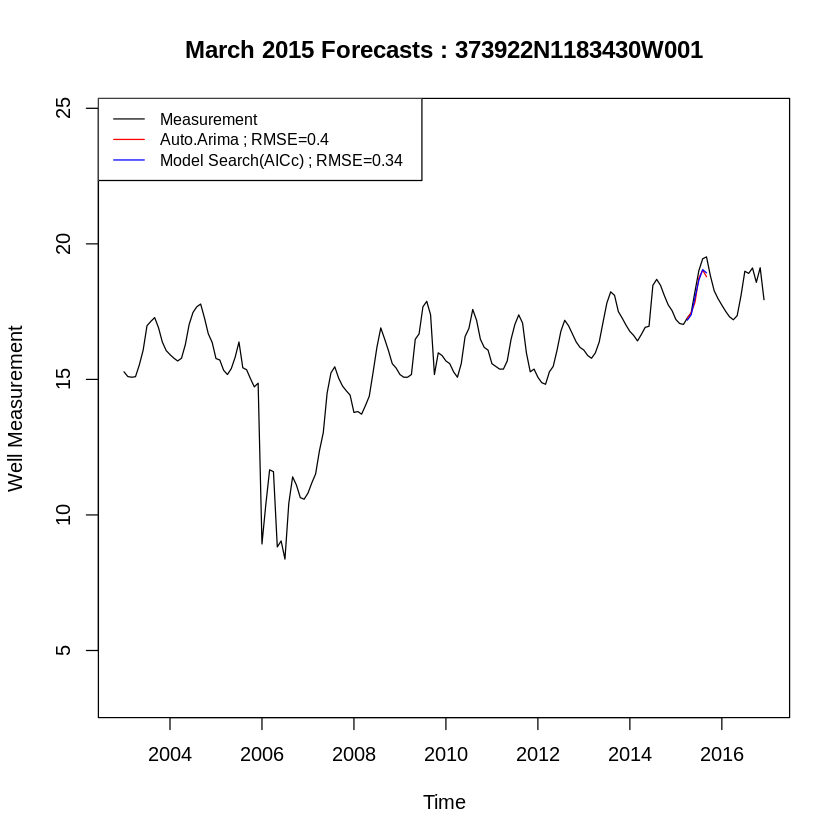

[1] "rmse auto  2.16  RMSE best  5.44"
[1] "########################################"
[1] 2016
[1] "rmse auto  8.24  RMSE best  3.26"
[1] "########################################"
[1] 2016


Warning message in if (prediction_auto_arima == 0) {:
“the condition has length > 1 and only the first element will be used”


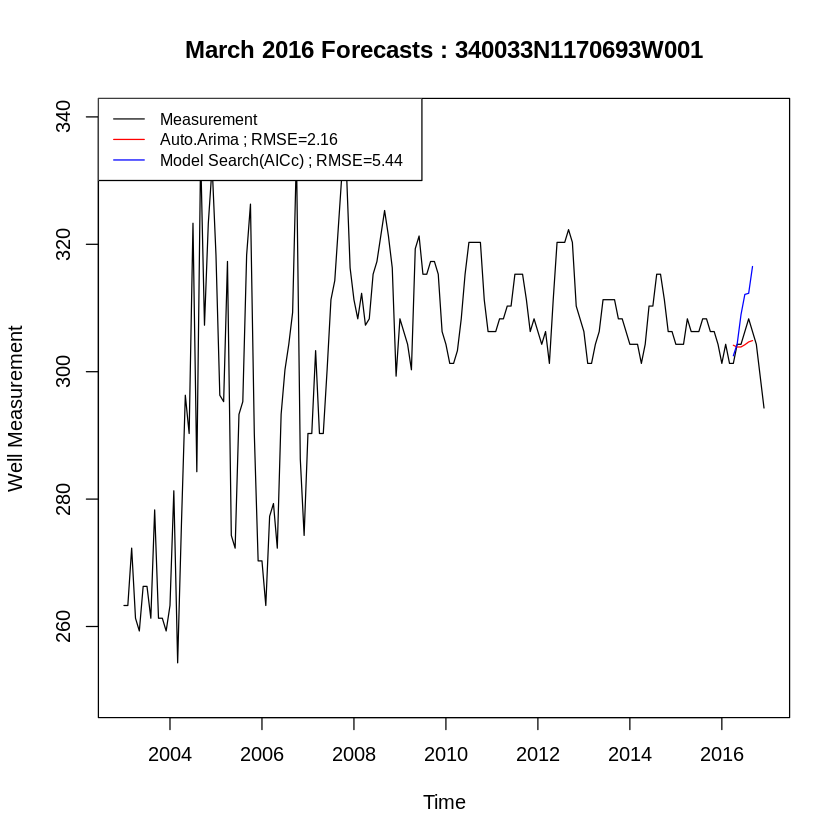

[1] "rmse auto  5.05  RMSE best  5.35"
[1] "########################################"
[1] 2016


Warning message in if (prediction_auto_arima == 0) {:
“the condition has length > 1 and only the first element will be used”


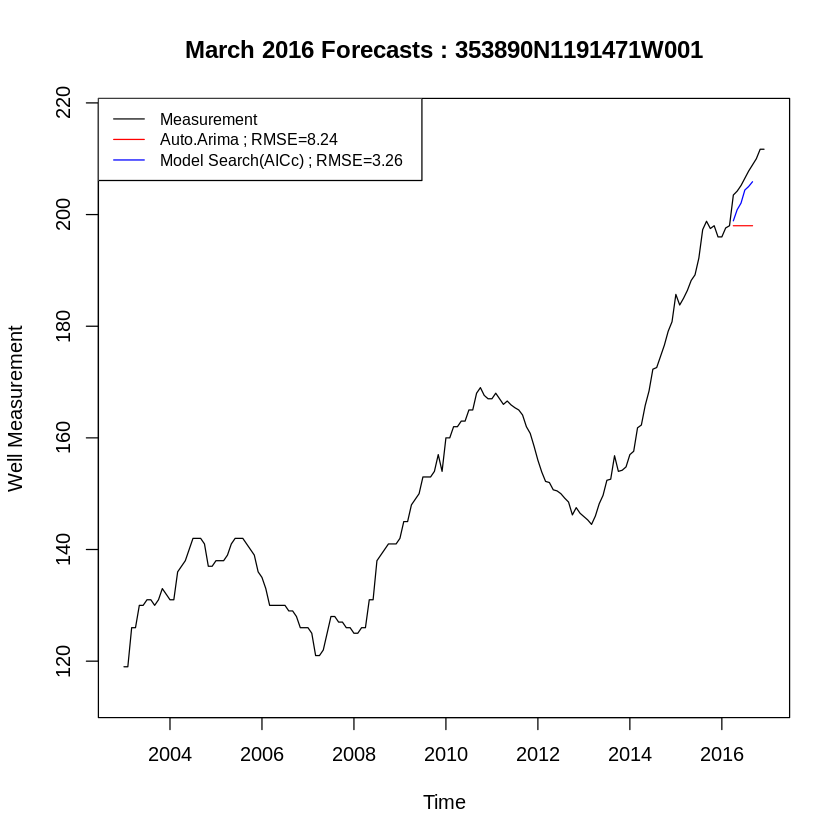

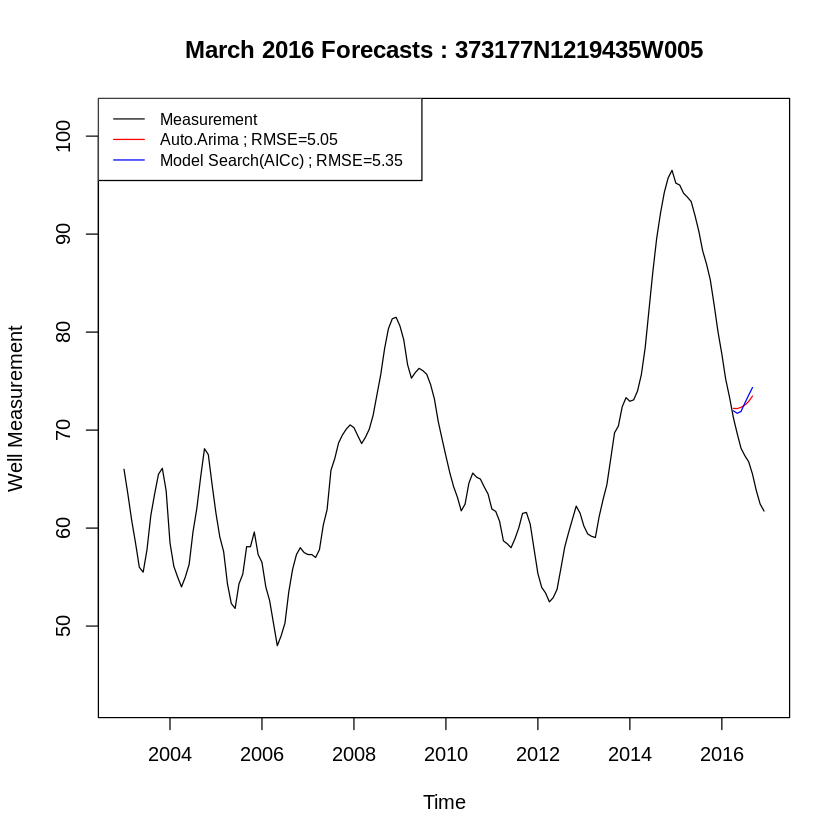

[1] "rmse auto  0.18  RMSE best  0.31"
[1] "########################################"


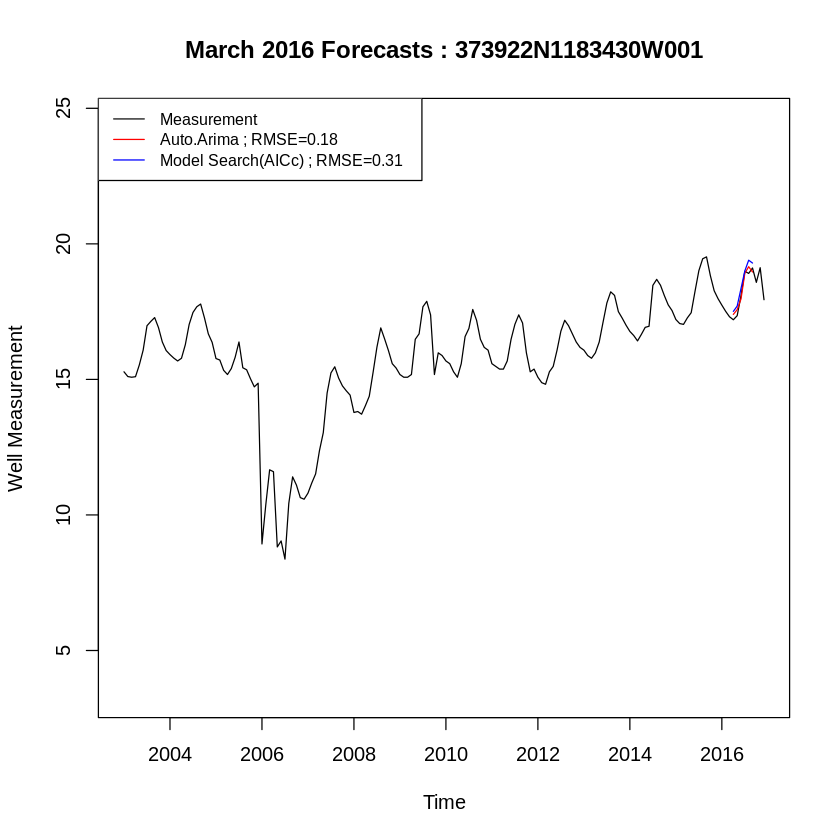

In [4]:
library(tseries)
library(forecast)
getTSDataFromFileAll=function(in_file,num_mos=12) {
    cdd=read.delim(in_file,header=TRUE)
    if(dim(cdd)[1]!=168) {
        stop(paste("Read ",length(cdd)," rows of data, but expected 168 rows of data!"))
    }
    num_rows_tot=num_mos
    cdd_for_ts=cdd[1:num_rows_tot,]
    cddts=ts(cdd_for_ts, start=c(2003,1),frequency=12) 
    return(cddts)   
}

indices_df=data.frame(
    Year=c(2013,2014,2015,2016),
    JanIdx=c(121,133,145,157),
    MarIdx=c(121,133,145,157)+2
)
print(indices_df)

getSiteNameFromFile=function(f) {
    df=read.csv(f,header=TRUE)
    site_name=colnames(df)[1]
    if(startsWith(site_name,"X")) {
        site_name=substring(site_name, 2)
    }
    return(site_name)
}

RMSECalc=function(actual,predicted) {
    residuals=actual-predicted
    sq_residuals=residuals^2
    mean_sq_residuals=mean(sq_residuals)
    root_mean_sq_residuals=sqrt(mean_sq_residuals)
    return(root_mean_sq_residuals)
}


plotThem=function(all_data,train_data,pred_data_a,pred_data_b,main_title) {
    twelths=seq(from=2003.0,to=2016+(23.0/24.0),by=1.0/12.0)
    #all data
    x_all=twelths
    y_all=all_data
    
    #train data (assumed to be prefix of all data)
    num_train=length(train_data)
    x_train=twelths[c(1:num_train)]
    y_train=train_data
    
    #prediction data a (assumed to start immediately after train)
    num_pred=length(pred_data_a)
    pred_idx=(num_train+1):(num_train+num_pred)
    x_pred_a=twelths[pred_idx]
    y_pred_a=pred_data_a
    
    #prediction data b (assumed to start immediately after train)
    x_pred_b=twelths[pred_idx]
    y_pred_b=pred_data_b
    
    #calc RMSEs
    pred_a_rmse=round(RMSECalc(y_all[pred_idx],y_pred_a),2)
    pred_b_rmse=round(RMSECalc(y_all[pred_idx],y_pred_b),2)
    
    
    #do the plotting
    temp_y_data=unlist(c(y_all,y_pred_a,y_pred_b))
    ylim_top=max(temp_y_data)+5
    plot(x=x_all,y=y_all,type="l",main=main_title,
         ylim=c(max(min(temp_y_data)-5,0),ylim_top),
         xlab="Time",ylab="Well Measurement"
        )
    lines(x=x_pred_a,y=y_pred_a,col="red",type="l")
    lines(x=x_pred_b,y=y_pred_b,col="blue",type="l")
    legend(x="topleft", legend=c("Measurement",
                                 paste("Auto.Arima ; RMSE=",pred_a_rmse,sep=""),
                                 paste("Model Search(AICc) ; RMSE=",pred_b_rmse,sep="")),
       col=c("black","red", "blue"), lty=1, cex=0.8)
    
    return(c(pred_a_rmse,pred_b_rmse))
    
    
}

rmsedata_df=data.frame(
    Well=c(),
    Year=c(),
    AutoArimaRMSE=c(),
    BestARIMARMSE=c()
)


for(year in c(2013,2014,2015,2016)) {
    for(f_idx in 1:length(cnra_files)) {
        print(year)
        yearRows=indices_df[indices_df$Year==year,]
        marIdx=yearRows$MarIdx
        tsd_all=getTSDataFromFileAll(cnra_files[f_idx],num_mos=168)
        tsd=ts(tsd_all[seq(from=1,to=marIdx,by=1)], start=c(2003,1),frequency=12) 
        defaultW <- getOption("warn")
        options(warn = -1)
        #tba=get.best.arima(tsd,maxord=c(2,2,2,2,2,2))
        tba=get.best.arima(tsd)
        best_settings=head(tba,n=1)$model
        #print(paste("best settings ",best_settings))
        best_model=getArimapdqPDQFromModelStr(best_settings,tsd)
        best_model_prediction=predict(best_model,n.ahead = 6)
        #print("best_model_prediction")
        #print(best_model_prediction$pred)
        options(warn = defaultW)
        arima_model=auto.arima(tsd)
        prediction_auto_arima=0
        tryCatch({
            temp_prediction_auto_arima=predict(arima_model,n.ahead = 6)
            prediction_auto_arima=temp_prediction_auto_arima$pred
            },error=function(cond) { })
        if(prediction_auto_arima==0) {
            prediction_auto_arima=rep(tsd[length(tsd)],6)
            }            
        #print("prediction_auto_arima")
        #print(prediction_auto_arima)
        main_title=paste("March ",year," Forecasts : ",getSiteNameFromFile(cnra_files[f_idx]),sep="")
        rmses_ret=plotThem(tsd_all,tsd,prediction_auto_arima,best_model_prediction$pred,main_title)
        rmse_auto_arima=rmses_ret[1]
        rmse_best_arima=rmses_ret[2]
        print(paste("rmse auto ",rmse_auto_arima," RMSE best ",rmse_best_arima))
        rmsedata_df=rbind(rmsedata_df,
                          c(getSiteNameFromFile(cnra_files[f_idx]),
                            as.numeric(year),as.numeric(rmse_auto_arima),as.numeric(rmse_best_arima)))
        print("########################################")
    }
}


In [5]:
colnames(rmsedata_df)=c("Well","Year","AutoArimaRMSE","BestARIMARMSE")

In [6]:
rmsedata_df

Well,Year,AutoArimaRMSE,BestARIMARMSE
<chr>,<chr>,<chr>,<chr>
340033N1170693W001,2013,4.6,6.35
353890N1191471W001,2013,8.13,6.79
373177N1219435W005,2013,3.35,3.44
373922N1183430W001,2013,1.72,0.39
340033N1170693W001,2014,5.48,4.79
353890N1191471W001,2014,4.09,0.77
373177N1219435W005,2014,8.01,6.21
373922N1183430W001,2014,1.02,0.31
340033N1170693W001,2015,3.18,7.93


In [7]:
dim(rmsedata_df)

[1] 16  4

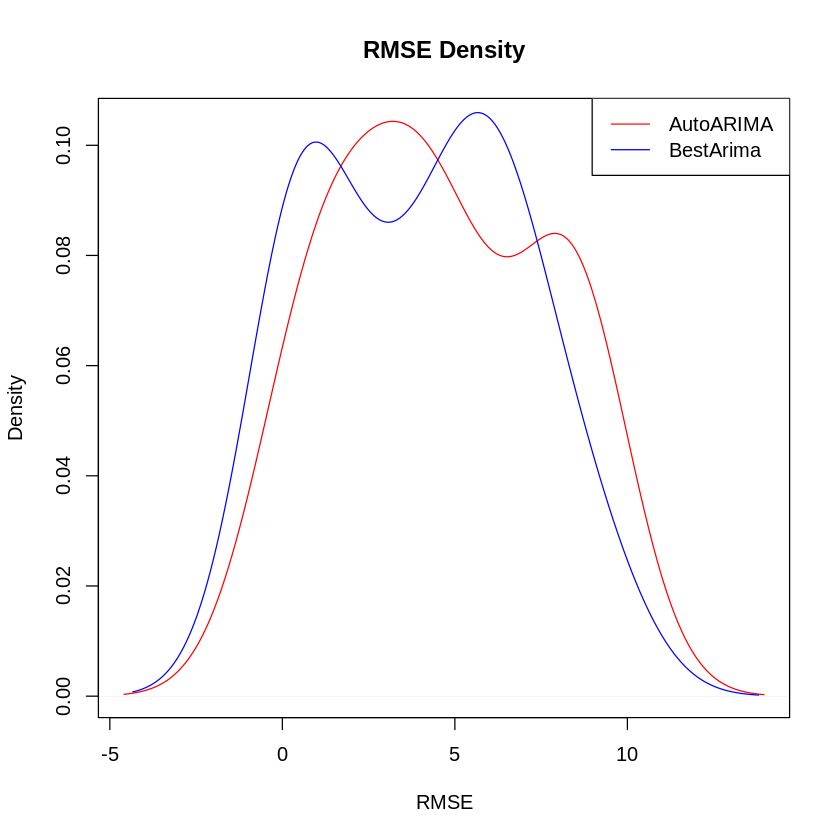

In [8]:
#plot(density(MyData$Column1))
#lines(density(MyData$Column2))
plot(density(as.numeric(rmsedata_df$AutoArimaRMSE)),col="red",main="RMSE Density",xlab="RMSE")
lines(density(as.numeric(rmsedata_df$BestARIMARMSE)),col="blue")
legend(x="topright",legend=c("AutoARIMA","BestArima"),col=c("red","blue"),lty=1)
#    legend(x="topleft", legend=c("Measurement",
#                                 paste("Auto.Arima ; RMSE=",pred_a_rmse,sep=""),
#                                 paste("Model Search(AICc) ; RMSE=",pred_b_rmse,sep="")),
#       col=c("black","red", "blue"), lty=1, cex=0.8)


In [9]:
print(mean(as.numeric(rmsedata_df$AutoArimaRMSE)))

[1] 4.575


In [10]:
print(mean(as.numeric(rmsedata_df$BestARIMARMSE)))

[1] 3.914375
